# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Data

In [ ]:
df=pd.read_csv('/content/india-state-wise-data-analysis.csv')
df.head()

,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,ST,...,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50,district_code,state_name,district
0,870354,474190,396164,439654,282823,156831,1048,1046,2,70352,...,6402,405015,289765,694780,600759,178435,89679,1,JAMMU AND KASHMIR,Kupwara
1,753745,398041,355704,335649,207741,127908,368,343,25,23912,...,6857,374972,342646,717618,503223,160933,88978,2,JAMMU AND KASHMIR,Badgam
2,133487,78971,54516,93770,62834,30936,488,444,44,95857,...,575,75493,32637,108130,70703,41515,21019,3,JAMMU AND KASHMIR,Leh(Ladakh)
3,140802,77785,63017,86236,56301,29935,18,12,6,122336,...,408,82938,39854,122792,87532,35561,17488,4,JAMMU AND KASHMIR,Kargil
4,476835,251899,224936,261724,163333,98391,556,406,150,176101,...,1884,288430,164044,452474,304979,109818,61334,5,JAMMU AND KASHMIR,Punch


In [ ]:
df.info() #Column wise info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Population                        640 non-null    int64 
 1   Male                              640 non-null    int64 
 2   Female                            640 non-null    int64 
 3   Literate                          640 non-null    int64 
 4   Male_Literate                     640 non-null    int64 
 5   Female_Literate                   640 non-null    int64 
 6   SC                                640 non-null    int64 
 7   Male_SC                           640 non-null    int64 
 8   Female_SC                         640 non-null    int64 
 9   ST                                640 non-null    int64 
 10  Male_ST                           640 non-null    int64 
 11  Female_ST                         640 non-null    int64 
 12  Workers               

# Sub Assignment 1: Processing the Dataset

In [ ]:
import pandas as pd

def split_combined_data(df):
    #Split the combined data column into separate columns.
    df[['district_code', 'state_name', 'district']] = df['State & District'].str.split(',', expand=True)
    df.drop(columns=['State & District'], inplace=True)

    df['district_code'] = df['district_code'].str.split(':', expand=True)[1]
    df['state_name'] = df['state_name'].str.split(':', expand=True)[1]
    df['district'] = df['district'].str.split(':', expand=True)[1]

    return df

def handle_missing_values(df):
    df.fillna(df.mean(), inplace=True)  # Fill missing numeric values with the mean
    df.fillna('Missing', inplace=True)  # Fill missing categorical values with a placeholder

    return df

def main():
    # Load the CSV file into a DataFrame
    input_file = '/content/india-state-wise-data-analysis.csv'
    df = pd.read_csv(input_file)

    df = split_combined_data(df) #Split Combined Data

    df = handle_missing_values(df)#Handle Missing Values

    output_file = '/content/india-state-wise-data-analysis.csv' # Save DataFrame to a new CSV file
    df.to_csv(output_file, index=False)
    print("Data preprocessing completed.")

if __name__ == "__main__":
    main()


# Sub Assignment 2: Exploring Indian States Data

 "1. What is the population of each state?"

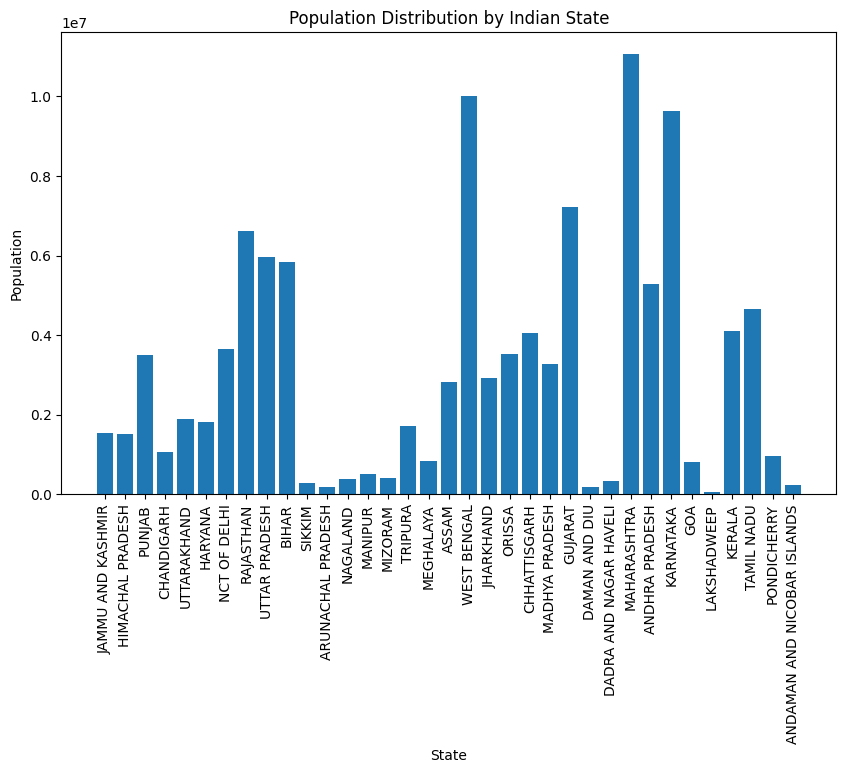

In [ ]:
plt.figure(figsize=(10, 6)) # Create a new figure with a specific size
plt.title('Population Distribution by Indian State') # Set the title of the plot
plt.xlabel('State') # Set the label for the x-axis
plt.ylabel('Population') # set the label for the y-axis
plt.bar(df["state_name"],df["Population"]) # Create a bar plot on axis
plt.xticks(rotation=90) ## Rotate the x-axis labels for better readability
plt.show() # Show the plot

"2. how are the 'Male' and 'Female' populations distributed across Indian states?

<Figure size 1400x600 with 0 Axes>

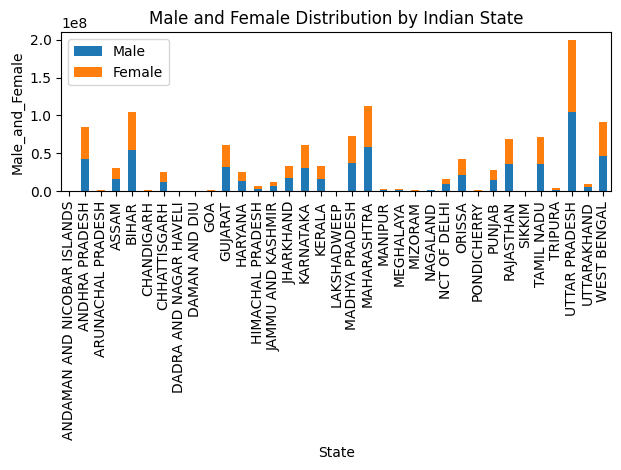

In [ ]:
# Group the data by state_name and calculate the total Male and Female
grouped_data = df.groupby('state_name')[['Male', 'Female']].sum()

# Create a bar plot
plt.figure(figsize=(14, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Male and Female Distribution by Indian State')
plt.xlabel('State')
plt.ylabel('Male_and_Female')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

"3. how is the distribution of literate individuals across Indian states?"

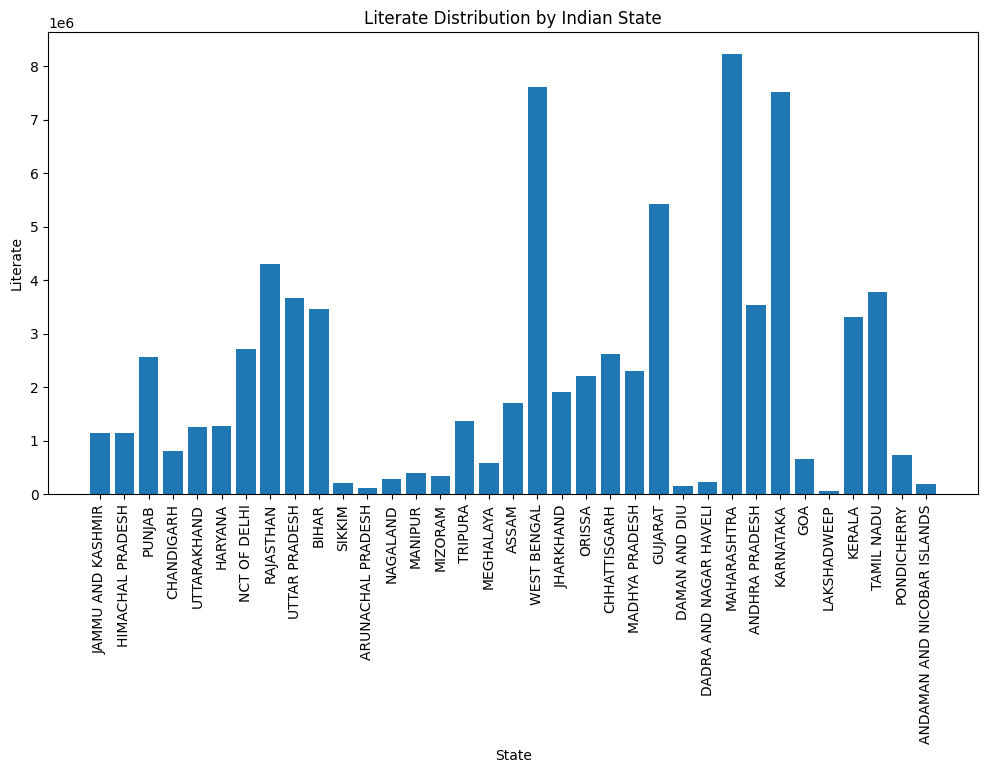

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Literate Distribution by Indian State')
plt.xlabel('State')
plt.ylabel('Literate')
plt.bar(df["state_name"],df["Literate"])
plt.xticks(rotation=90)
# Show the plot
plt.show()

"4. how are the 'Male' and 'Female' Literate distributed across Indian states?

<Figure size 1400x600 with 0 Axes>

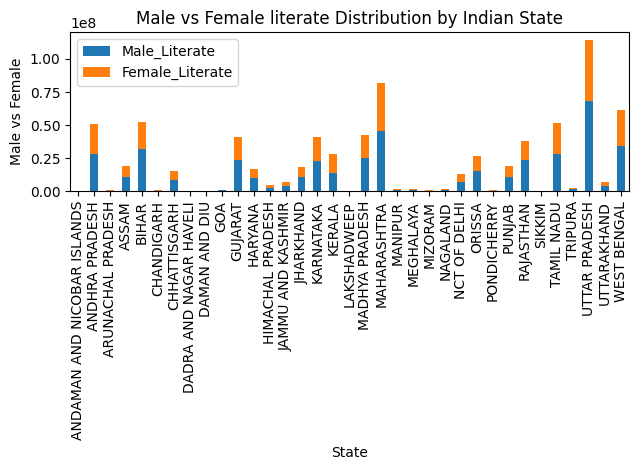

In [ ]:
# Group the data by state_name and calculate the total 'Male_Literate' and 'Female_Literate'
grouped_data = df.groupby('state_name')[['Male_Literate', 'Female_Literate']].sum()

# Create a bar plot
plt.figure(figsize=(14, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Male vs Female literate Distribution by Indian State')
plt.xlabel('State')
plt.ylabel('Male vs Female')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

"5. how is the distribution of Workers individuals across Indian states?"

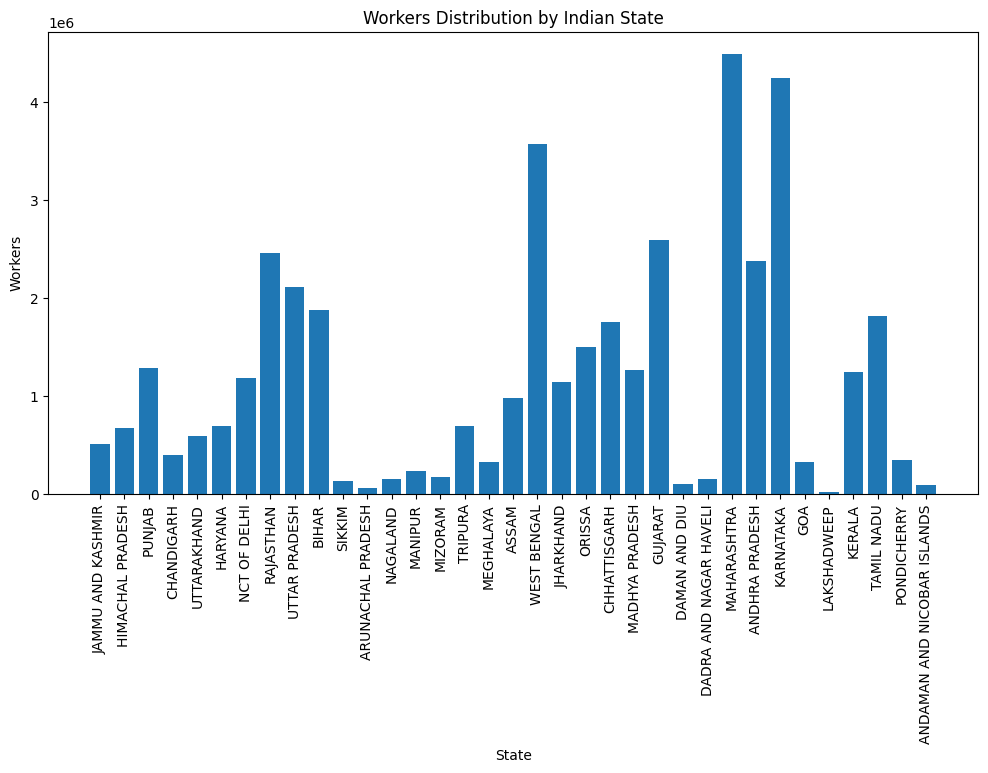

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Workers Distribution by Indian State')
plt.xlabel('State')
plt.ylabel('Workers')
plt.bar(df["state_name"],df["Workers"])
plt.xticks(rotation=90)
# Show the plot
plt.show()

"6. how are the 'Male' and 'Female' Workers distributed across Indian states?

<Figure size 1600x1000 with 0 Axes>

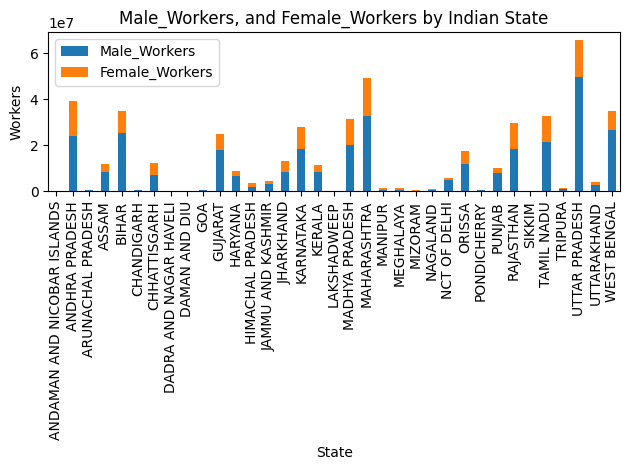

In [ ]:
# Group the data by state and calculate the total 'Male_Workers' and 'Female_Workers'
grouped_data = df.groupby('state_name')[['Male_Workers','Female_Workers']].sum()

# Create a bar graph
plt.figure(figsize=(16, 10))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Male_Workers, and Female_Workers by Indian State')
plt.xlabel('State')
plt.ylabel('Workers')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

"7. how is the distribution of Households individuals across Indian states?"

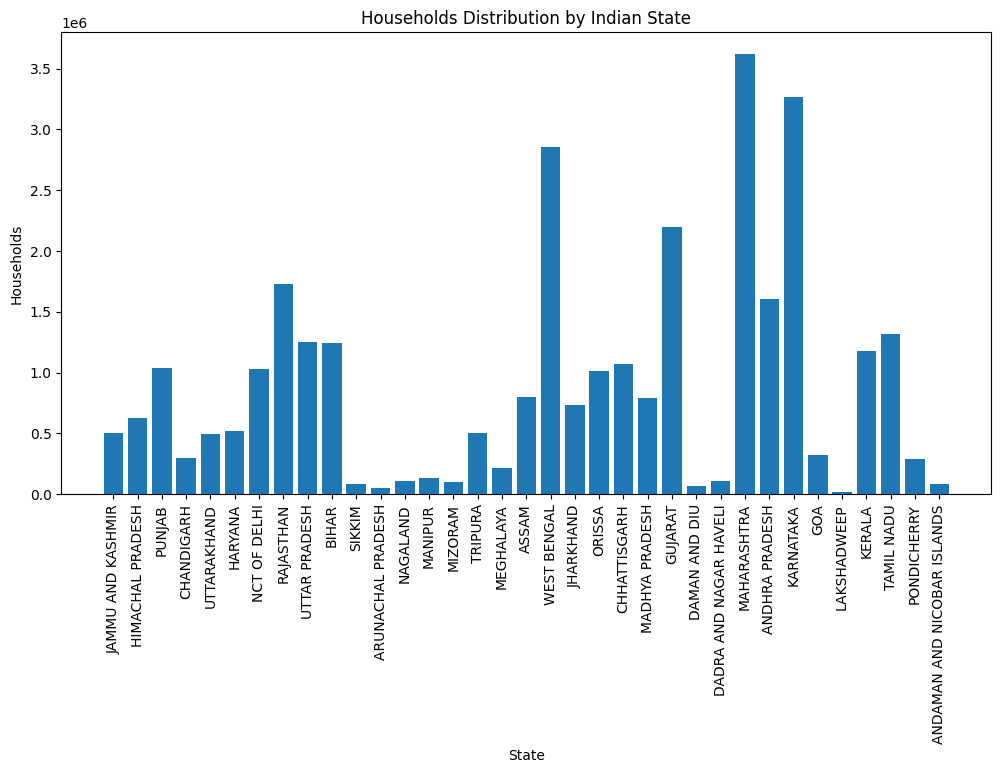

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Households Distribution by Indian State')
plt.xlabel('State')
plt.ylabel('Households')
plt.bar(df["state_name"],df["Households"])
plt.xticks(rotation=90)
# Show the plot
plt.show()

"8. how are the 'Rural' and 'Urban' Households distributed across Indian states?

<Figure size 1600x800 with 0 Axes>

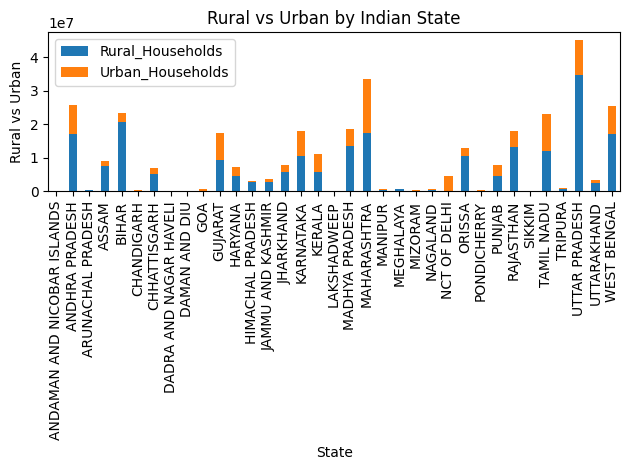

In [ ]:
# Group the data by state_name and calculate the total 'Rural_Households' and 'Urban_Households'
grouped_data = df.groupby('state_name')[['Rural_Households', 'Urban_Households']].sum()

# Create a bar plot
plt.figure(figsize=(16, 8))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Rural vs Urban by Indian State')
plt.xlabel('State')
plt.ylabel('Rural vs Urban')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

"9. how is the distribution of Education individuals across Indian states?"

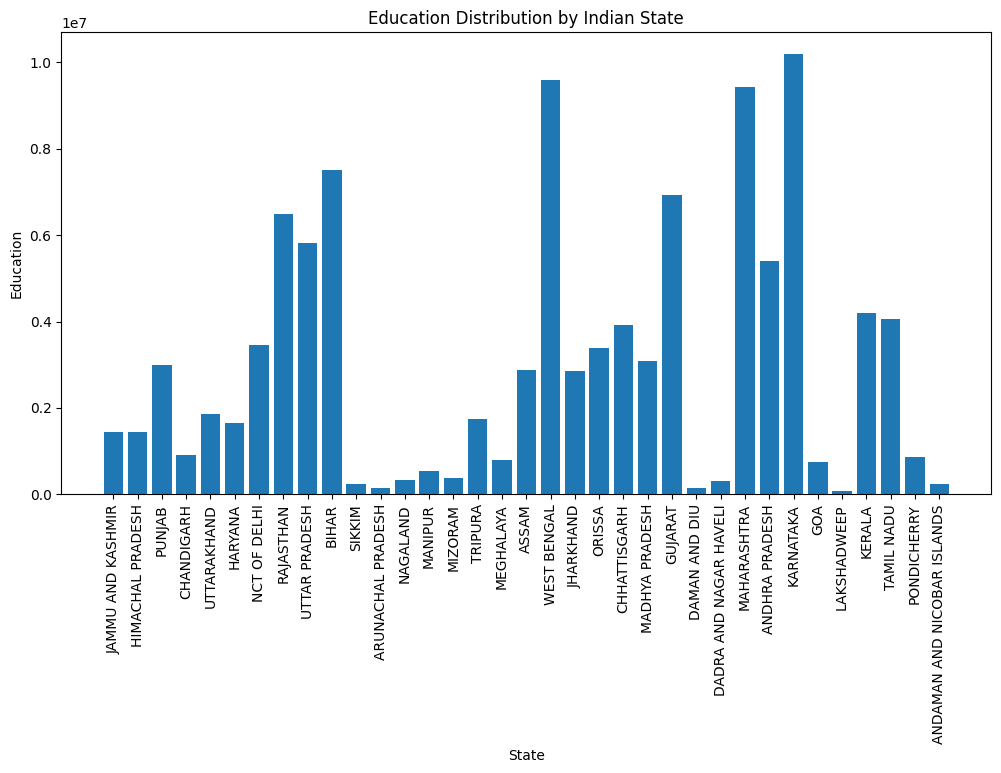

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Education Distribution by Indian State')
plt.xlabel('State')
plt.ylabel('Education')
plt.bar(df["state_name"],df["Total_Education"])
plt.xticks(rotation=90)
# Show the plot
plt.show()

"10. how are the 'Literate' and 'Illiterate' Education distributed across Indian states?

<Figure size 1600x800 with 0 Axes>

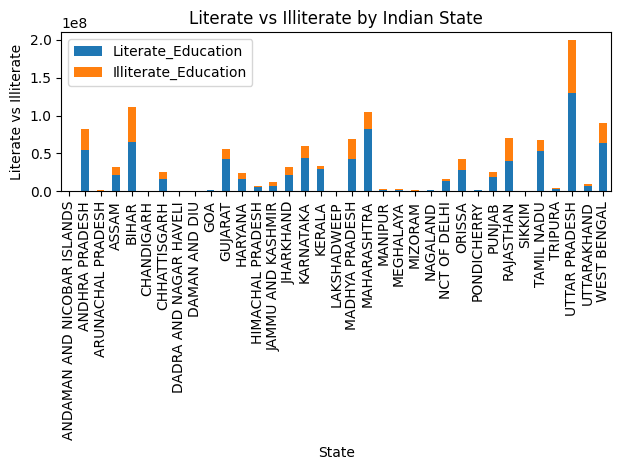

In [ ]:
# Group the data by state_name and calculate the total Literate and Illiterate
grouped_data = df.groupby('state_name')[['Literate_Education', 'Illiterate_Education']].sum()

# Create a bar plot
plt.figure(figsize=(16, 8))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Literate vs Illiterate by Indian State')
plt.xlabel('State')
plt.ylabel('Literate vs Illiterate')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

"11. how are the 'Age_Group_0_29','Age_Group_30_49' and 'Age_Group_50' distributed across Indian states?

<Figure size 1600x1000 with 0 Axes>

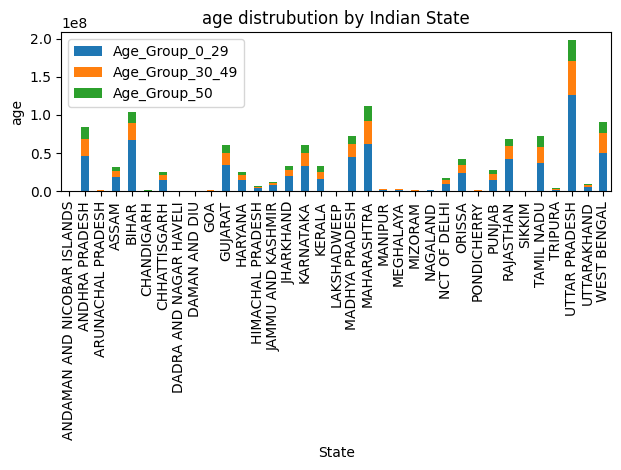

In [ ]:
# Group the data by state and calculate the total 'Age_Group_0_29','Age_Group_30_49','Age_Group_50'
grouped_data = df.groupby('state_name')[['Age_Group_0_29','Age_Group_30_49','Age_Group_50']].sum()

# Create a bar graph
plt.figure(figsize=(16, 10))
grouped_data.plot(kind='bar', stacked=True)
plt.title('age distrubution by Indian State')
plt.xlabel('State')
plt.ylabel('age')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


# Sub Assignment 3: Transforming CSV Data into a MySQL Relational Database

In [ ]:
#!pip install mysql-connector-python

In [ ]:
import mysql.connector #import MySQL connector library
conn = mysql.connector.connect(user="root",password="admin",host="localhost",database="world") # Establish a connection to the MySQL database.

#Creating Table
sql = 'CREATE TABLE india_state_data(dataid INT AUTO_INCREMENT PRIMARY KEY,Population VARCHAR(50),Male VARCHAR(50),Female VARCHAR(50),Literate VARCHAR(50),Male_Literate VARCHAR(50),Female_Literate VARCHAR(50),SC VARCHAR(50),Male_SC VARCHAR(50),Female_SC VARCHAR(50),ST VARCHAR(50),Male_ST VARCHAR(50),Female_ST VARCHAR(50),Workers VARCHAR(50),Male_Workers VARCHAR(50),Female_Workers VARCHAR(50),Main_Workers VARCHAR(50),Marginal_Workers VARCHAR(50),Non_Workers VARCHAR(50),Cultivator_Workers VARCHAR(50),Agricultural_Workers VARCHAR(50),Household_Workers VARCHAR(50),Other_Workers VARCHAR(50),Hindus VARCHAR(50),Muslims VARCHAR(50),Christians VARCHAR(50),Sikhs VARCHAR(50),Buddhists VARCHAR(50),Jains VARCHAR(50),Others_Religions VARCHAR(50),Religion_Not_Stated VARCHAR(50),LPG_or_PNG_Households VARCHAR(50),Housholds_with_Electric_Lighting VARCHAR(50),Households_with_Internet VARCHAR(50),Households_with_Computer VARCHAR(50),Rural_Households VARCHAR(50),Urban_Households VARCHAR(50),Households VARCHAR(50),Below_Primary_Education VARCHAR(50),Primary_Education VARCHAR(50),Middle_Education VARCHAR(50),Secondary_Education VARCHAR(50),Higher_Education VARCHAR(50),Graduate_Education VARCHAR(50),Other_Education VARCHAR(50),Literate_Education VARCHAR(50),Illiterate_Education VARCHAR(50),Total_Education VARCHAR(50),Age_Group_0_29 VARCHAR(50),Age_Group_30_49 VARCHAR(50),Age_Group_50 VARCHAR(50),district_code VARCHAR(50),state_name VARCHAR(100),district VARCHAR(50))'

myc = conn.cursor() #cursor object for executing SQL queries on the database connection.
myc.execute(sql) #Execute query

In [ ]:
# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    sql = f"INSERT INTO india_state_data(Population, Male, Female, Literate, Male_Literate, Female_Literate, SC, Male_SC, Female_SC, ST, Male_ST, Female_ST, Workers, Male_Workers, Female_Workers, Main_Workers, Marginal_Workers, Non_Workers, Cultivator_Workers, Agricultural_Workers, Household_Workers, Other_Workers, Hindus, Muslims, Christians, Sikhs, Buddhists, Jains, Others_Religions, Religion_Not_Stated, LPG_or_PNG_Households, Housholds_with_Electric_Lighting, Households_with_Internet, Households_with_Computer, Rural_Households, Urban_Households, Households, Below_Primary_Education, Primary_Education, Middle_Education, Secondary_Education, Higher_Education, Graduate_Education, Other_Education, Literate_Education, Illiterate_Education, Total_Education, Age_Group_0_29, Age_Group_30_49, Age_Group_50, district_code, state_name, district) VALUES ({row['Population']}, {row['Male']}, {row['Female']}, {row['Literate']}, {row['Male_Literate']}, {row['Female_Literate']}, {row['SC']}, {row['Male_SC']}, {row['Female_SC']}, {row['ST']}, {row['Male_ST']}, {row['Female_ST']}, {row['Workers']}, {row['Male_Workers']}, {row['Female_Workers']}, {row['Main_Workers']}, {row['Marginal_Workers']}, {row['Non_Workers']}, {row['Cultivator_Workers']}, {row['Agricultural_Workers']}, {row['Household_Workers']}, {row['Other_Workers']}, {row['Hindus']}, {row['Muslims']}, {row['Christians']}, {row['Sikhs']}, {row['Buddhists']}, {row['Jains']}, {row['Others_Religions']}, {row['Religion_Not_Stated']}, {row['LPG_or_PNG_Households']}, {row['Housholds_with_Electric_Lighting']}, {row['Households_with_Internet']}, {row['Households_with_Computer']}, {row['Rural_Households']}, {row['Urban_Households']}, {row['Households']}, {row['Below_Primary_Education']}, {row['Primary_Education']}, {row['Middle_Education']}, {row['Secondary_Education']}, {row['Higher_Education']}, {row['Graduate_Education']}, {row['Other_Education']}, {row['Literate_Education']}, {row['Illiterate_Education']}, {row['Total_Education']}, {row['Age_Group_0_29']}, {row['Age_Group_30_49']}, {row['Age_Group_50']}, '{row['district_code']}', '{row['state_name']}', '{row['district']}')"
    myc = conn.cursor() #cursor object for executing SQL queries on the database connection.
    myc.execute(sql) #Execute query
    conn.commit() #Commit changes

# Close the database connection when done
conn.close()